In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [132]:
def mse(array):
    return np.mean(array.flatten() ** 2)

In [133]:
p = np.array([[1,1,1], 
              [1,2,1], 
              [2,-1,1], 
              [2,0,1], 
              [-1,2,1], 
              [-2,1,1], 
              [-1,-1,1], 
              [-2,-2,1]], dtype='float')

t = np.array([[1,1],
              [1,1],
              [1,0],
              [1,0],
              [0,1],
              [0,1],
              [0,0],
              [0,0]], dtype='float')

weight = np.array([[0,0, 1],
                   [0,0, 1]], dtype='float')

errors = np.zeros([8,2], dtype='float')
mean_squared_error = 1

mse_iterations = []

learning_rate = 0.01
error_threshold = 0.04

In [134]:
while mean_squared_error > error_threshold:
    for i in range(0, len(p)):
        a = np.dot(weight,p[i])
        e = t[i] - a
        errors[i] = e
        weight[0] = weight[0] + 2 * learning_rate * e[0] * p[i]
        weight[1] = weight[1] + 2 * learning_rate * e[1] * p[i]
    mean_squared_error = mse(errors)
    mse_iterations.append(mean_squared_error)

print(weight)
print("Final MSE: " + str(mse(errors)))

[[ 0.29751401  0.00408416  0.56559364]
 [-0.07788981  0.30312181  0.5013251 ]]
Final MSE: 0.03849238190607263


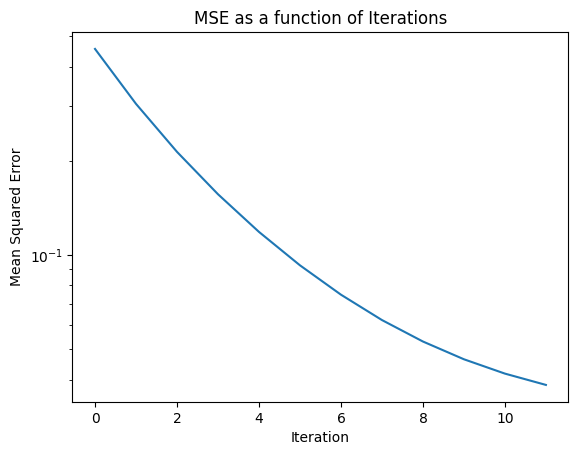

In [135]:
plt.title("MSE as a function of Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.semilogy(mse_iterations)

In [136]:
dt = np.dtype([('input', 'U2'), ('t1', 'f8'), ('t2', 'f8'), ('t3', 'f8'), ('t4', 'f8')])
table = np.zeros(len(p), dtype=dt)
for i in range(0, len(p)):
    actual_output = np.dot(weight, p[i])
    
    table[i] = np.array([("p" + str(i+1), mse([1,1] - actual_output), mse([1,0] - actual_output), mse([0,1] - actual_output), mse([0,0] - actual_output))], dtype=dt)

print("  MSE between each output and the 4 classes")
print(pd.DataFrame(table))

  MSE between each output and the 4 classes
  input        t1        t2        t3        t4
0    p1  0.046205  0.272762  0.413396  0.639953
1    p2  0.008725  0.538404  0.380001  0.909680
2    p3  0.470728  0.013152  1.127266  0.669689
3    p4  0.227055  0.072601  0.887677  0.733222
4    p5  0.279106  0.964564  0.055354  0.740812
5    p6  0.526462  0.986689  0.001112  0.461339
6    p7  0.532872  0.308965  0.296867  0.072961
7    p8  0.988742  0.539603  0.451139  0.002000
